# Verarbeitung der Exceltabellen für ersten ML Test

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## I) Ergebnisse WFR Dichteseparation

In [3]:
file_path = "original_data/Ergebnisse WFR Dichteseparation.xlsx"

### 1) einfaches Einlesen der Daten

In [4]:
temp_df = pd.read_excel(file_path, sheet_name='WFR')
temp_df.head(10)

,Versuchsreihe Wiederfindungsraten nach Dichteseparation!,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Schmelzenthalpie 100%:,191.35,J/g,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Zusammensetzung,NaN,NaN,Temperaturprogramm,Auswertung,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lfd. Nr.,Bezeichnung,Matrix,Polymer,Masse Polymer [g],NaN,Masse Polymerfraktion nach DS [g],Schmelzenthalpie [J/g],σ [J/g],"ω PE (191,35 J/g) [%]",...,WFR [%],Toleanz [%],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,DS Sand-PE-100ppm-1,PF Sand,PE-GUR,0.1001,-50 bis 250 mit 20 K/min,0.0858,129.5,3.328663,67.677032,...,58.008884,1.491058,52.121241,±,1.571741,%,NaN,57.597811,1.919454,0.033325
4,2,DS Sand-PE-100ppm-2,PF Sand,PE-GUR,0.1008,NaN,0.0692,128.866667,4.605793,67.34605,...,46.233598,1.652424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,DS Sand-PE-60ppm-1,PF Sand,PE-GUR,0.0596,NaN,0.0467,137.866667,11.673189,72.049473,...,56.454872,4.780041,57.677276,±,2.511300,%,NaN,NaN,NaN,NaN
6,4,DS Sand-PE-60ppm-2,PF Sand,PE-GUR,0.0595,NaN,0.0496,135.2,0.556776,70.655866,...,58.89968,0.242559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,DS Sand-PE-20ppm-1,PF Sand,PE-GUR,0.0198,NaN,0.0163,148.666667,1.677299,77.693581,...,63.959867,0.721613,62.994915,±,1.675322,%,NaN,NaN,NaN,NaN
8,6,DS Sand-PE-20ppm-2,PF Sand,PE-GUR,0.02,NaN,0.0169,140.466667,5.95343,73.40824,...,62.029963,2.62903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Einfaches Einlesen ist nicht möglich!

### 2) Einlesen der Daten (Schrittweise)

#### Nr. und Bezeichnung

In [5]:
df_nr_bezeichnung = pd.read_excel(file_path, sheet_name='WFR', skiprows=3, usecols="A,B")
df_nr_bezeichnung.head(8)

,Lfd. Nr.,Bezeichnung
0,1.0,DS Sand-PE-100ppm-1
1,2.0,DS Sand-PE-100ppm-2
2,3.0,DS Sand-PE-60ppm-1
3,4.0,DS Sand-PE-60ppm-2
4,5.0,DS Sand-PE-20ppm-1
5,6.0,DS Sand-PE-20ppm-2
6,NaN,NaN
7,7.0,DS Elbe-PE-100ppm-1


#### Zusammensetzungen

In [6]:
df_zusammensetzung = pd.read_excel(file_path, sheet_name='WFR', skiprows=3, usecols="C:E")
df_zusammensetzung.columns = ["Zusammensetzung_" + col for col in df_zusammensetzung.columns]
df_zusammensetzung.head(10)

,Zusammensetzung_Matrix,Zusammensetzung_Polymer,Zusammensetzung_Masse Polymer [g]
0,PF Sand,PE-GUR,0.1001
1,PF Sand,PE-GUR,0.1008
2,PF Sand,PE-GUR,0.0596
3,PF Sand,PE-GUR,0.0595
4,PF Sand,PE-GUR,0.0198
5,PF Sand,PE-GUR,0.0200
6,NaN,NaN,NaN
7,PF Elbe,PE-GUR,0.0100
8,PF Elbe,PE-GUR,0.0102
9,PF Elbe,PE-GUR,0.0060


#### Temperaturprogramm

In [7]:
df_temperaturprogramm = pd.read_excel(file_path, sheet_name='WFR', skiprows=3, usecols="F")
df_temperaturprogramm.columns = ["Temperaturprogramm"]

# Auffüllen der NaN-Werte mit dem vorherigen Wert
df_temperaturprogramm["Temperaturprogramm"] = df_temperaturprogramm["Temperaturprogramm"].ffill()

df_temperaturprogramm.head(8)

,Temperaturprogramm
0,-50 bis 250 mit 20 K/min
1,-50 bis 250 mit 20 K/min
2,-50 bis 250 mit 20 K/min
3,-50 bis 250 mit 20 K/min
4,-50 bis 250 mit 20 K/min
5,-50 bis 250 mit 20 K/min
6,-50 bis 250 mit 20 K/min
7,-50 bis 250 mit 20 K/min


#### Auswertungen

In [8]:
df_auswertung = pd.read_excel(file_path, sheet_name='WFR', skiprows=3, usecols="G:O")
df_auswertung.columns = ["Auswertung_" + col for col in df_auswertung.columns]
df_auswertung.head(8)

,Auswertung_Masse Polymerfraktion nach DS [g],Auswertung_Schmelzenthalpie [J/g],Auswertung_σ [J/g],"Auswertung_ω PE (191,35 J/g) [%]",Auswertung_Toleranz [%],Auswertung_Masse PE in Zielfraktion [g],Auswertung_Anzahl Einzelbestimmungen n,Auswertung_WFR [%],Auswertung_Toleanz [%]
0,0.0858,129.500000,3.328663,67.677032,1.739568,0.058067,3.0,58.008884,1.491058
1,0.0692,128.866667,4.605793,67.346050,2.406999,0.046603,3.0,46.233598,1.652424
2,0.0467,137.866667,11.673189,72.049473,6.100438,0.033647,3.0,56.454872,4.780041
3,0.0496,135.200000,0.556776,70.655866,0.290973,0.035045,3.0,58.899680,0.242559
4,0.0163,148.666667,1.677299,77.693581,0.876561,0.012664,3.0,63.959867,0.721613
5,0.0169,140.466667,5.953430,73.408240,3.111278,0.012406,3.0,62.029963,2.629030
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0203,90.540000,20.920022,47.316436,10.932857,0.009605,3.0,96.052365,22.193699


#### Zusammenführung der Dataframes

In [9]:
df_wfr_temp = pd.concat([df_nr_bezeichnung, df_zusammensetzung, df_temperaturprogramm, df_auswertung], axis=1)
df_wfr_temp.head(8)

,Lfd. Nr.,Bezeichnung,Zusammensetzung_Matrix,Zusammensetzung_Polymer,Zusammensetzung_Masse Polymer [g],Temperaturprogramm,Auswertung_Masse Polymerfraktion nach DS [g],Auswertung_Schmelzenthalpie [J/g],Auswertung_σ [J/g],"Auswertung_ω PE (191,35 J/g) [%]",Auswertung_Toleranz [%],Auswertung_Masse PE in Zielfraktion [g],Auswertung_Anzahl Einzelbestimmungen n,Auswertung_WFR [%],Auswertung_Toleanz [%]
0,1.0,DS Sand-PE-100ppm-1,PF Sand,PE-GUR,0.1001,-50 bis 250 mit 20 K/min,0.0858,129.500000,3.328663,67.677032,1.739568,0.058067,3.0,58.008884,1.491058
1,2.0,DS Sand-PE-100ppm-2,PF Sand,PE-GUR,0.1008,-50 bis 250 mit 20 K/min,0.0692,128.866667,4.605793,67.346050,2.406999,0.046603,3.0,46.233598,1.652424
2,3.0,DS Sand-PE-60ppm-1,PF Sand,PE-GUR,0.0596,-50 bis 250 mit 20 K/min,0.0467,137.866667,11.673189,72.049473,6.100438,0.033647,3.0,56.454872,4.780041
3,4.0,DS Sand-PE-60ppm-2,PF Sand,PE-GUR,0.0595,-50 bis 250 mit 20 K/min,0.0496,135.200000,0.556776,70.655866,0.290973,0.035045,3.0,58.899680,0.242559
4,5.0,DS Sand-PE-20ppm-1,PF Sand,PE-GUR,0.0198,-50 bis 250 mit 20 K/min,0.0163,148.666667,1.677299,77.693581,0.876561,0.012664,3.0,63.959867,0.721613
5,6.0,DS Sand-PE-20ppm-2,PF Sand,PE-GUR,0.0200,-50 bis 250 mit 20 K/min,0.0169,140.466667,5.953430,73.408240,3.111278,0.012406,3.0,62.029963,2.629030
6,NaN,NaN,NaN,NaN,NaN,-50 bis 250 mit 20 K/min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,DS Elbe-PE-100ppm-1,PF Elbe,PE-GUR,0.0100,-50 bis 250 mit 20 K/min,0.0203,90.540000,20.920022,47.316436,10.932857,0.009605,3.0,96.052365,22.193699


In [10]:
# Entfernen der NaN Spalten
df_wfr = df_wfr_temp.dropna(subset=["Bezeichnung"])
df_wfr.head(8)

,Lfd. Nr.,Bezeichnung,Zusammensetzung_Matrix,Zusammensetzung_Polymer,Zusammensetzung_Masse Polymer [g],Temperaturprogramm,Auswertung_Masse Polymerfraktion nach DS [g],Auswertung_Schmelzenthalpie [J/g],Auswertung_σ [J/g],"Auswertung_ω PE (191,35 J/g) [%]",Auswertung_Toleranz [%],Auswertung_Masse PE in Zielfraktion [g],Auswertung_Anzahl Einzelbestimmungen n,Auswertung_WFR [%],Auswertung_Toleanz [%]
0,1.0,DS Sand-PE-100ppm-1,PF Sand,PE-GUR,0.1001,-50 bis 250 mit 20 K/min,0.0858,129.500000,3.328663,67.677032,1.739568,0.058067,3.0,58.008884,1.491058
1,2.0,DS Sand-PE-100ppm-2,PF Sand,PE-GUR,0.1008,-50 bis 250 mit 20 K/min,0.0692,128.866667,4.605793,67.346050,2.406999,0.046603,3.0,46.233598,1.652424
2,3.0,DS Sand-PE-60ppm-1,PF Sand,PE-GUR,0.0596,-50 bis 250 mit 20 K/min,0.0467,137.866667,11.673189,72.049473,6.100438,0.033647,3.0,56.454872,4.780041
3,4.0,DS Sand-PE-60ppm-2,PF Sand,PE-GUR,0.0595,-50 bis 250 mit 20 K/min,0.0496,135.200000,0.556776,70.655866,0.290973,0.035045,3.0,58.899680,0.242559
4,5.0,DS Sand-PE-20ppm-1,PF Sand,PE-GUR,0.0198,-50 bis 250 mit 20 K/min,0.0163,148.666667,1.677299,77.693581,0.876561,0.012664,3.0,63.959867,0.721613
5,6.0,DS Sand-PE-20ppm-2,PF Sand,PE-GUR,0.0200,-50 bis 250 mit 20 K/min,0.0169,140.466667,5.953430,73.408240,3.111278,0.012406,3.0,62.029963,2.629030
7,7.0,DS Elbe-PE-100ppm-1,PF Elbe,PE-GUR,0.0100,-50 bis 250 mit 20 K/min,0.0203,90.540000,20.920022,47.316436,10.932857,0.009605,3.0,96.052365,22.193699
8,8.0,DS Elbe-PE-100ppm-2,PF Elbe,PE-GUR,0.0102,-50 bis 250 mit 20 K/min,0.0501,30.726667,17.623636,16.057835,9.210157,0.008045,3.0,78.872306,45.238125


In [11]:
df_wfr.to_csv("data/000_wfr_dichteseparation.csv", index=False)
df_wfr.to_excel("data/Excel/000_wfr_dichteseparation.xlsx", index=False)

## II) Excel-Sheet 'Masse pro Tiegel'

In [12]:
df_masse_pro_tiegel = pd.read_excel(file_path, sheet_name='Masse pro Tiegel', skiprows=4)
df_masse_pro_tiegel.head(8)

,Lfd. Nr.,Bezeichnung,Tiegeleinwage [mg],Schmelzenthalpie [J/g],"ω PE (191,35 J/g) [ ]",Masse PE im Tiegel [mg],Mittelwert [mg],Stabw.s [mg],Partikle pro Tiegel [ ],Mittelwert über alle Proben mit der selben MP-Konz. [mg],stabw.s
0,1.0,DS Sand-PE-100ppm-1,1.11,133.3,0.696629,0.773258,0.731166,0.039009,429.588015,411.786623,19.725074
1,2.0,NaN,1.04,128.1,0.669454,0.696232,NaN,NaN,386.795575,NaN,NaN
2,3.0,NaN,1.09,127.1,0.664228,0.724008,NaN,NaN,402.226868,NaN,NaN
3,4.0,DS Sand-PE-100ppm-2,1.13,124.4,0.650118,0.734633,0.751266,0.036426,408.129373,NaN,NaN
4,5.0,NaN,1.18,128.6,0.672067,0.793039,NaN,NaN,440.577185,NaN,NaN
5,6.0,NaN,1.04,133.6,0.698197,0.726125,NaN,NaN,403.402723,NaN,NaN
6,7.0,DS Sand-PE-60ppm-1,1.02,144.1,0.753070,0.768132,0.743209,0.083469,426.739831,414.491092,29.538009
7,8.0,NaN,1.00,124.4,0.650118,0.650118,NaN,NaN,361.176436,NaN,NaN


In [13]:
# Entfernt Leerzeichen am Anfang und Ende der Spaltennamen
df_masse_pro_tiegel.columns = df_masse_pro_tiegel.columns.str.strip()

In [14]:
# Entfernen der NaN Spalten
df_masse_pro_tiegel = df_masse_pro_tiegel.dropna(subset=["Lfd. Nr."])
df_masse_pro_tiegel.head(8)

,Lfd. Nr.,Bezeichnung,Tiegeleinwage [mg],Schmelzenthalpie [J/g],"ω PE (191,35 J/g) [ ]",Masse PE im Tiegel [mg],Mittelwert [mg],Stabw.s [mg],Partikle pro Tiegel [ ],Mittelwert über alle Proben mit der selben MP-Konz. [mg],stabw.s
0,1.0,DS Sand-PE-100ppm-1,1.11,133.3,0.696629,0.773258,0.731166,0.039009,429.588015,411.786623,19.725074
1,2.0,NaN,1.04,128.1,0.669454,0.696232,NaN,NaN,386.795575,NaN,NaN
2,3.0,NaN,1.09,127.1,0.664228,0.724008,NaN,NaN,402.226868,NaN,NaN
3,4.0,DS Sand-PE-100ppm-2,1.13,124.4,0.650118,0.734633,0.751266,0.036426,408.129373,NaN,NaN
4,5.0,NaN,1.18,128.6,0.672067,0.793039,NaN,NaN,440.577185,NaN,NaN
5,6.0,NaN,1.04,133.6,0.698197,0.726125,NaN,NaN,403.402723,NaN,NaN
6,7.0,DS Sand-PE-60ppm-1,1.02,144.1,0.753070,0.768132,0.743209,0.083469,426.739831,414.491092,29.538009
7,8.0,NaN,1.00,124.4,0.650118,0.650118,NaN,NaN,361.176436,NaN,NaN


In [15]:
# Wende ffill() auf alle Spalten außer "Bezeichnung" an
df_masse_pro_tiegel.loc[:, df_masse_pro_tiegel.columns != "Bezeichnung"] = df_masse_pro_tiegel.loc[:, df_masse_pro_tiegel.columns != "Bezeichnung"].ffill()
df_masse_pro_tiegel.head(8)

,Lfd. Nr.,Bezeichnung,Tiegeleinwage [mg],Schmelzenthalpie [J/g],"ω PE (191,35 J/g) [ ]",Masse PE im Tiegel [mg],Mittelwert [mg],Stabw.s [mg],Partikle pro Tiegel [ ],Mittelwert über alle Proben mit der selben MP-Konz. [mg],stabw.s
0,1.0,DS Sand-PE-100ppm-1,1.11,133.3,0.696629,0.773258,0.731166,0.039009,429.588015,411.786623,19.725074
1,2.0,NaN,1.04,128.1,0.669454,0.696232,0.731166,0.039009,386.795575,411.786623,19.725074
2,3.0,NaN,1.09,127.1,0.664228,0.724008,0.731166,0.039009,402.226868,411.786623,19.725074
3,4.0,DS Sand-PE-100ppm-2,1.13,124.4,0.650118,0.734633,0.751266,0.036426,408.129373,411.786623,19.725074
4,5.0,NaN,1.18,128.6,0.672067,0.793039,0.751266,0.036426,440.577185,411.786623,19.725074
5,6.0,NaN,1.04,133.6,0.698197,0.726125,0.751266,0.036426,403.402723,411.786623,19.725074
6,7.0,DS Sand-PE-60ppm-1,1.02,144.1,0.753070,0.768132,0.743209,0.083469,426.739831,414.491092,29.538009
7,8.0,NaN,1.00,124.4,0.650118,0.650118,0.743209,0.083469,361.176436,414.491092,29.538009


> - ist Masse pro Tiegel wichtig 
> - Bezeichnung aus WTF entnehmen oder Wert oberhalb (dann ungleich)

In [16]:
df_masse_pro_tiegel.to_csv("data/000_masse_pro_tiegel.csv", index=False)
df_masse_pro_tiegel.to_excel("data/Excel/000_masse_pro_tiegel.xlsx", index=False)

## III) Einwaagen DSC-Messungen

In [17]:
file_path = "original_data/Einwaagen DSC-Messungen.xlsx"

### 1) einfaches Einlesen der Daten

In [18]:
df_temp = pd.read_excel(file_path, skiprows=1)
df_temp.head(8)

,Nummer,Datum der DSCMessung _Probe,Untersuchung,Probenhalter,m Tara,m Proben,dHm,Ø;sigma,Tm,dHc,Ø;sigma.1,Tc,w ( dHm),w (dHc),Anreicherungsrate,Unnamed: 15,Unnamed: 16,Bemerkungen,Unnamed: 18,Unnamed: 19
0,L001,26-06-2020_Mod.S+PE_1_25 ppm,10K/Min hkh -50 bis 300°C,Lucas Proben_A1,51.93,8.34,5.675,NaN,130.7,-6.276,NaN,118.8,NaN,NaN,0.000025,NaN,NaN,"graues pulver, leichter glanz an einigen parti...",NaN,NaN
1,L002,NaN,NaN,Lucas Proben_A2,51.91,8.49,4.522,5.093667,130.8,-5.199,-5.781667,118.8,0.031002,0.032070,1240.089268,1282.819318,NaN,"Geräte: Netzsch DSC214 Polyma, Mettler Dualran...",NaN,NaN
2,L003,NaN,NaN,Lucas Proben_A3,51.57,7.86,5.084,0.576561,130.7,-5.87,0.543907,118.9,0.596265,0.553109,NaN,NaN,NaN,PE-GUR Standard für Hm 90-150 =Q9 /Hc 125-60°C=S9,NaN,NaN
3,L004,26-06-2020_Mod.S+PE_1_50 ppm,NaN,Lucas Proben_A4,51.54,8.59,4.175,NaN,130.3,-5.263,NaN,119.0,NaN,NaN,0.00005,NaN,NaN,NaN,NaN,NaN
4,L005,NaN,NaN,Lucas Proben_A5,51.32,8.39,5.796,5.085667,130.5,-6.464,-5.874000,119.0,0.030954,0.032583,619.070805,651.652984,165.9,NaN,-181.8,NaN
5,L006,NaN,NaN,Lucas Proben_A6,51.76,9.57,5.286,0.828861,130.5,-5.895,0.600775,119.0,0.857187,0.610940,NaN,NaN,164.1,NaN,-180.2,NaN
6,L007,26-06-2020_Mod.S+PE_1_80 ppm,NaN,Lucas Proben_A7,51.64,7.68,16.3,NaN,130.7,-17.77,NaN,118.9,NaN,NaN,0.00008,NaN,164.4,164.3,-180.5,-180.280000
7,L008,NaN,NaN,Lucas Proben_A8,51.22,7.35,19.49,18.333333,131.2,-21.26,-20.093333,118.6,0.111584,0.111456,1394.806249,1393.203165,163.5,0.966954,-179.2,0.983362


In [19]:
df_temp.columns

Index(['Nummer', 'Datum der DSCMessung _Probe', 'Untersuchung', 'Probenhalter',
       'm Tara', 'm Proben', 'dHm', 'Ø;sigma', 'Tm', 'dHc', 'Ø;sigma.1', 'Tc',
       'w ( dHm)', 'w (dHc)', 'Anreicherungsrate', 'Unnamed: 15',
       'Unnamed: 16', 'Bemerkungen', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [20]:
# Entfernung der Leerzeichen
df_temp.columns = df_temp.columns.str.replace(' ', '', regex=True)
df_temp.columns

Index(['Nummer', 'DatumderDSCMessung_Probe', 'Untersuchung', 'Probenhalter',
       'mTara', 'mProben', 'dHm', 'Ø;sigma', 'Tm', 'dHc', 'Ø;sigma.1', 'Tc',
       'w(dHm)', 'w(dHc)', 'Anreicherungsrate', 'Unnamed:15', 'Unnamed:16',
       'Bemerkungen', 'Unnamed:18', 'Unnamed:19'],
      dtype='object')

### 2) Einlesen der Daten (Schrittweise)

#### Spalten 'Nummer' bis 'Probe'

In [21]:
df_nr_probe = pd.read_excel(file_path, skiprows=1, usecols="A:F")
df_nr_probe.head()

,Nummer,Datum der DSCMessung _Probe,Untersuchung,Probenhalter,m Tara,m Proben
0,L001,26-06-2020_Mod.S+PE_1_25 ppm,10K/Min hkh -50 bis 300°C,Lucas Proben_A1,51.93,8.34
1,L002,NaN,NaN,Lucas Proben_A2,51.91,8.49
2,L003,NaN,NaN,Lucas Proben_A3,51.57,7.86
3,L004,26-06-2020_Mod.S+PE_1_50 ppm,NaN,Lucas Proben_A4,51.54,8.59
4,L005,NaN,NaN,Lucas Proben_A5,51.32,8.39


#### Spalten '90-150'

In [22]:
df_90_150 = pd.read_excel(file_path, skiprows=1, usecols="G:I")
df_90_150.columns = [col + "_90_150" for col in df_90_150.columns]
df_90_150.head()

,dHm_90_150,Ø;sigma_90_150,Tm_90_150
0,5.675,NaN,130.7
1,4.522,5.093667,130.8
2,5.084,0.576561,130.7
3,4.175,NaN,130.3
4,5.796,5.085667,130.5


#### Spalten '60-125'

In [23]:
df_60_125 = pd.read_excel(file_path, skiprows=1, usecols="J:N")
df_60_125.columns = [col + "_60_125" for col in df_60_125.columns]
df_60_125.head()

,dHc_60_125,Ø;sigma.1_60_125,Tc_60_125,w ( dHm)_60_125,w (dHc)_60_125
0,-6.276,NaN,118.8,NaN,NaN
1,-5.199,-5.781667,118.8,0.031002,0.032070
2,-5.87,0.543907,118.9,0.596265,0.553109
3,-5.263,NaN,119.0,NaN,NaN
4,-6.464,-5.874000,119.0,0.030954,0.032583


#### weitere

In [24]:
df_more = pd.read_excel(file_path, skiprows=1, usecols="O:Q")
df_more.head()

,Anreicherungsrate,Unnamed: 15,Unnamed: 16
0,0.000025,NaN,NaN
1,1240.089268,1282.819318,NaN
2,NaN,NaN,NaN
3,0.00005,NaN,NaN
4,619.070805,651.652984,165.9


#### Zusammenführung

In [25]:
df_dsc = pd.concat([df_nr_probe, df_90_150, df_60_125, df_more], axis=1)
df_dsc.columns = df_dsc.columns.str.replace(' ', '', regex=True)
df_dsc.head()

,Nummer,DatumderDSCMessung_Probe,Untersuchung,Probenhalter,mTara,mProben,dHm_90_150,Ø;sigma_90_150,Tm_90_150,dHc_60_125,Ø;sigma.1_60_125,Tc_60_125,w(dHm)_60_125,w(dHc)_60_125,Anreicherungsrate,Unnamed:15,Unnamed:16
0,L001,26-06-2020_Mod.S+PE_1_25 ppm,10K/Min hkh -50 bis 300°C,Lucas Proben_A1,51.93,8.34,5.675,NaN,130.7,-6.276,NaN,118.8,NaN,NaN,0.000025,NaN,NaN
1,L002,NaN,NaN,Lucas Proben_A2,51.91,8.49,4.522,5.093667,130.8,-5.199,-5.781667,118.8,0.031002,0.032070,1240.089268,1282.819318,NaN
2,L003,NaN,NaN,Lucas Proben_A3,51.57,7.86,5.084,0.576561,130.7,-5.87,0.543907,118.9,0.596265,0.553109,NaN,NaN,NaN
3,L004,26-06-2020_Mod.S+PE_1_50 ppm,NaN,Lucas Proben_A4,51.54,8.59,4.175,NaN,130.3,-5.263,NaN,119.0,NaN,NaN,0.00005,NaN,NaN
4,L005,NaN,NaN,Lucas Proben_A5,51.32,8.39,5.796,5.085667,130.5,-6.464,-5.874000,119.0,0.030954,0.032583,619.070805,651.652984,165.9


In [26]:
df_dsc.to_csv("data/000_dsc.csv", index=False)
df_dsc.to_excel("data/Excel/000_dsc.xlsx", index=False)

## IV) Merge der Dataframes (der drei Exceltabellen)

In [27]:
df_wfr.head()

,Lfd. Nr.,Bezeichnung,Zusammensetzung_Matrix,Zusammensetzung_Polymer,Zusammensetzung_Masse Polymer [g],Temperaturprogramm,Auswertung_Masse Polymerfraktion nach DS [g],Auswertung_Schmelzenthalpie [J/g],Auswertung_σ [J/g],"Auswertung_ω PE (191,35 J/g) [%]",Auswertung_Toleranz [%],Auswertung_Masse PE in Zielfraktion [g],Auswertung_Anzahl Einzelbestimmungen n,Auswertung_WFR [%],Auswertung_Toleanz [%]
0,1.0,DS Sand-PE-100ppm-1,PF Sand,PE-GUR,0.1001,-50 bis 250 mit 20 K/min,0.0858,129.500000,3.328663,67.677032,1.739568,0.058067,3.0,58.008884,1.491058
1,2.0,DS Sand-PE-100ppm-2,PF Sand,PE-GUR,0.1008,-50 bis 250 mit 20 K/min,0.0692,128.866667,4.605793,67.346050,2.406999,0.046603,3.0,46.233598,1.652424
2,3.0,DS Sand-PE-60ppm-1,PF Sand,PE-GUR,0.0596,-50 bis 250 mit 20 K/min,0.0467,137.866667,11.673189,72.049473,6.100438,0.033647,3.0,56.454872,4.780041
3,4.0,DS Sand-PE-60ppm-2,PF Sand,PE-GUR,0.0595,-50 bis 250 mit 20 K/min,0.0496,135.200000,0.556776,70.655866,0.290973,0.035045,3.0,58.899680,0.242559
4,5.0,DS Sand-PE-20ppm-1,PF Sand,PE-GUR,0.0198,-50 bis 250 mit 20 K/min,0.0163,148.666667,1.677299,77.693581,0.876561,0.012664,3.0,63.959867,0.721613


In [28]:
df_dsc.head()

,Nummer,DatumderDSCMessung_Probe,Untersuchung,Probenhalter,mTara,mProben,dHm_90_150,Ø;sigma_90_150,Tm_90_150,dHc_60_125,Ø;sigma.1_60_125,Tc_60_125,w(dHm)_60_125,w(dHc)_60_125,Anreicherungsrate,Unnamed:15,Unnamed:16
0,L001,26-06-2020_Mod.S+PE_1_25 ppm,10K/Min hkh -50 bis 300°C,Lucas Proben_A1,51.93,8.34,5.675,NaN,130.7,-6.276,NaN,118.8,NaN,NaN,0.000025,NaN,NaN
1,L002,NaN,NaN,Lucas Proben_A2,51.91,8.49,4.522,5.093667,130.8,-5.199,-5.781667,118.8,0.031002,0.032070,1240.089268,1282.819318,NaN
2,L003,NaN,NaN,Lucas Proben_A3,51.57,7.86,5.084,0.576561,130.7,-5.87,0.543907,118.9,0.596265,0.553109,NaN,NaN,NaN
3,L004,26-06-2020_Mod.S+PE_1_50 ppm,NaN,Lucas Proben_A4,51.54,8.59,4.175,NaN,130.3,-5.263,NaN,119.0,NaN,NaN,0.00005,NaN,NaN
4,L005,NaN,NaN,Lucas Proben_A5,51.32,8.39,5.796,5.085667,130.5,-6.464,-5.874000,119.0,0.030954,0.032583,619.070805,651.652984,165.9


In [29]:
df_masse_pro_tiegel.head()

,Lfd. Nr.,Bezeichnung,Tiegeleinwage [mg],Schmelzenthalpie [J/g],"ω PE (191,35 J/g) [ ]",Masse PE im Tiegel [mg],Mittelwert [mg],Stabw.s [mg],Partikle pro Tiegel [ ],Mittelwert über alle Proben mit der selben MP-Konz. [mg],stabw.s
0,1.0,DS Sand-PE-100ppm-1,1.11,133.3,0.696629,0.773258,0.731166,0.039009,429.588015,411.786623,19.725074
1,2.0,NaN,1.04,128.1,0.669454,0.696232,0.731166,0.039009,386.795575,411.786623,19.725074
2,3.0,NaN,1.09,127.1,0.664228,0.724008,0.731166,0.039009,402.226868,411.786623,19.725074
3,4.0,DS Sand-PE-100ppm-2,1.13,124.4,0.650118,0.734633,0.751266,0.036426,408.129373,411.786623,19.725074
4,5.0,NaN,1.18,128.6,0.672067,0.793039,0.751266,0.036426,440.577185,411.786623,19.725074


### 1) Zusammenführung WFR und DSC

In [30]:
merged_df = pd.merge(df_wfr, df_dsc, how='left', left_on='Bezeichnung', right_on='DatumderDSCMessung_Probe')
merged_df.head(15)

,Lfd. Nr.,Bezeichnung,Zusammensetzung_Matrix,Zusammensetzung_Polymer,Zusammensetzung_Masse Polymer [g],Temperaturprogramm,Auswertung_Masse Polymerfraktion nach DS [g],Auswertung_Schmelzenthalpie [J/g],Auswertung_σ [J/g],"Auswertung_ω PE (191,35 J/g) [%]",...,Ø;sigma_90_150,Tm_90_150,dHc_60_125,Ø;sigma.1_60_125,Tc_60_125,w(dHm)_60_125,w(dHc)_60_125,Anreicherungsrate,Unnamed:15,Unnamed:16
0,1.0,DS Sand-PE-100ppm-1,PF Sand,PE-GUR,0.1001,-50 bis 250 mit 20 K/min,0.0858,129.500000,3.328663,67.677032,...,NaN,NaN,3 mg einwage später vermessen --> neue kalibri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,DS Sand-PE-100ppm-2,PF Sand,PE-GUR,0.1008,-50 bis 250 mit 20 K/min,0.0692,128.866667,4.605793,67.346050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,DS Sand-PE-60ppm-1,PF Sand,PE-GUR,0.0596,-50 bis 250 mit 20 K/min,0.0467,137.866667,11.673189,72.049473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,DS Sand-PE-60ppm-2,PF Sand,PE-GUR,0.0595,-50 bis 250 mit 20 K/min,0.0496,135.200000,0.556776,70.655866,...,NaN,NaN,blauer Partikel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,DS Sand-PE-20ppm-1,PF Sand,PE-GUR,0.0198,-50 bis 250 mit 20 K/min,0.0163,148.666667,1.677299,77.693581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,DS Sand-PE-20ppm-2,PF Sand,PE-GUR,0.0200,-50 bis 250 mit 20 K/min,0.0169,140.466667,5.953430,73.408240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,DS Elbe-PE-100ppm-1,PF Elbe,PE-GUR,0.0100,-50 bis 250 mit 20 K/min,0.0203,90.540000,20.920022,47.316436,...,90.540000,130.8,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,DS Elbe-PE-100ppm-2,PF Elbe,PE-GUR,0.0102,-50 bis 250 mit 20 K/min,0.0501,30.726667,17.623636,16.057835,...,30.726667,130.4,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,DS Elbe-PE-60ppm-1,PF Elbe,PE-GUR,0.0060,-50 bis 250 mit 20 K/min,0.0232,70.156667,11.248228,36.664054,...,70.156667,131.4,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,DS Elbe-PE-60ppm-2,PF Elbe,PE-GUR,0.0059,-50 bis 250 mit 20 K/min,0.0182,40.246667,6.832001,21.033011,...,40.246667,131.6,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Trim
merged_df.columns = merged_df.columns.str.strip()

### 2) Zusammenführung mit "Masse pro Tiegel"

In [32]:
df_big_merge = pd.merge(merged_df, df_masse_pro_tiegel, how='left', left_on='Lfd. Nr.', right_on='Lfd. Nr.')
df_big_merge

,Lfd. Nr.,Bezeichnung_x,Zusammensetzung_Matrix,Zusammensetzung_Polymer,Zusammensetzung_Masse Polymer [g],Temperaturprogramm,Auswertung_Masse Polymerfraktion nach DS [g],Auswertung_Schmelzenthalpie [J/g],Auswertung_σ [J/g],"Auswertung_ω PE (191,35 J/g) [%]",...,Bezeichnung_y,Tiegeleinwage [mg],Schmelzenthalpie [J/g],"ω PE (191,35 J/g) [ ]",Masse PE im Tiegel [mg],Mittelwert [mg],Stabw.s [mg],Partikle pro Tiegel [ ],Mittelwert über alle Proben mit der selben MP-Konz. [mg],stabw.s
0,1.0,DS Sand-PE-100ppm-1,PF Sand,PE-GUR,0.1001,-50 bis 250 mit 20 K/min,0.0858,129.500000,3.328663,67.677032,...,DS Sand-PE-100ppm-1,1.11,133.3,0.696629,0.773258,0.731166,0.039009,429.588015,411.786623,19.725074
1,2.0,DS Sand-PE-100ppm-2,PF Sand,PE-GUR,0.1008,-50 bis 250 mit 20 K/min,0.0692,128.866667,4.605793,67.346050,...,NaN,1.04,128.1,0.669454,0.696232,0.731166,0.039009,386.795575,411.786623,19.725074
2,3.0,DS Sand-PE-60ppm-1,PF Sand,PE-GUR,0.0596,-50 bis 250 mit 20 K/min,0.0467,137.866667,11.673189,72.049473,...,NaN,1.09,127.1,0.664228,0.724008,0.731166,0.039009,402.226868,411.786623,19.725074
3,4.0,DS Sand-PE-60ppm-2,PF Sand,PE-GUR,0.0595,-50 bis 250 mit 20 K/min,0.0496,135.200000,0.556776,70.655866,...,DS Sand-PE-100ppm-2,1.13,124.4,0.650118,0.734633,0.751266,0.036426,408.129373,411.786623,19.725074
4,5.0,DS Sand-PE-20ppm-1,PF Sand,PE-GUR,0.0198,-50 bis 250 mit 20 K/min,0.0163,148.666667,1.677299,77.693581,...,NaN,1.18,128.6,0.672067,0.793039,0.751266,0.036426,440.577185,411.786623,19.725074
5,6.0,DS Sand-PE-20ppm-2,PF Sand,PE-GUR,0.0200,-50 bis 250 mit 20 K/min,0.0169,140.466667,5.953430,73.408240,...,NaN,1.04,133.6,0.698197,0.726125,0.751266,0.036426,403.402723,411.786623,19.725074
6,7.0,DS Elbe-PE-100ppm-1,PF Elbe,PE-GUR,0.0100,-50 bis 250 mit 20 K/min,0.0203,90.540000,20.920022,47.316436,...,DS Sand-PE-60ppm-1,1.02,144.1,0.753070,0.768132,0.743209,0.083469,426.739831,414.491092,29.538009
7,8.0,DS Elbe-PE-100ppm-2,PF Elbe,PE-GUR,0.0102,-50 bis 250 mit 20 K/min,0.0501,30.726667,17.623636,16.057835,...,NaN,1.00,124.4,0.650118,0.650118,0.743209,0.083469,361.176436,414.491092,29.538009
8,9.0,DS Elbe-PE-60ppm-1,PF Elbe,PE-GUR,0.0060,-50 bis 250 mit 20 K/min,0.0232,70.156667,11.248228,36.664054,...,NaN,1.07,145.1,0.758296,0.811377,0.743209,0.083469,450.765032,414.491092,29.538009
9,10.0,DS Elbe-PE-60ppm-2,PF Elbe,PE-GUR,0.0059,-50 bis 250 mit 20 K/min,0.0182,40.246667,6.832001,21.033011,...,DS Sand-PE-60ppm-2,1.06,134.6,0.703423,0.745628,0.748959,0.008682,414.238016,414.491092,29.538009


In [33]:
df_big_merge.to_csv("data/001_big_merge.csv", index=False)
df_big_merge.to_excel("data/Excel/001_big_merge.xlsx", index=False)

## V) Data Preparation (Analysis)

In [34]:
df = df_big_merge.copy()

In [35]:
# checking datatypes of all columns
df.dtypes

Lfd. Nr.                                                    float64
Bezeichnung_x                                                object
Zusammensetzung_Matrix                                       object
Zusammensetzung_Polymer                                      object
Zusammensetzung_Masse Polymer [g]                           float64
Temperaturprogramm                                           object
Auswertung_Masse Polymerfraktion nach DS [g]                float64
Auswertung_Schmelzenthalpie [J/g]                           float64
Auswertung_σ [J/g]                                          float64
Auswertung_ω PE (191,35 J/g) [%]                            float64
Auswertung_Toleranz [%]                                     float64
Auswertung_Masse PE in Zielfraktion [g]                     float64
Auswertung_Anzahl Einzelbestimmungen n                      float64
Auswertung_WFR [%]                                          float64
Auswertung_Toleanz [%]                          

### 1) Cleaning der Daten

In [36]:
columns_before = df.columns

# Remove columns that only contains NaN/None/Null-values
df.dropna(axis = "columns", how = "all", inplace = True)
df

,Lfd. Nr.,Bezeichnung_x,Zusammensetzung_Matrix,Zusammensetzung_Polymer,Zusammensetzung_Masse Polymer [g],Temperaturprogramm,Auswertung_Masse Polymerfraktion nach DS [g],Auswertung_Schmelzenthalpie [J/g],Auswertung_σ [J/g],"Auswertung_ω PE (191,35 J/g) [%]",...,Bezeichnung_y,Tiegeleinwage [mg],Schmelzenthalpie [J/g],"ω PE (191,35 J/g) [ ]",Masse PE im Tiegel [mg],Mittelwert [mg],Stabw.s [mg],Partikle pro Tiegel [ ],Mittelwert über alle Proben mit der selben MP-Konz. [mg],stabw.s
0,1.0,DS Sand-PE-100ppm-1,PF Sand,PE-GUR,0.1001,-50 bis 250 mit 20 K/min,0.0858,129.500000,3.328663,67.677032,...,DS Sand-PE-100ppm-1,1.11,133.3,0.696629,0.773258,0.731166,0.039009,429.588015,411.786623,19.725074
1,2.0,DS Sand-PE-100ppm-2,PF Sand,PE-GUR,0.1008,-50 bis 250 mit 20 K/min,0.0692,128.866667,4.605793,67.346050,...,NaN,1.04,128.1,0.669454,0.696232,0.731166,0.039009,386.795575,411.786623,19.725074
2,3.0,DS Sand-PE-60ppm-1,PF Sand,PE-GUR,0.0596,-50 bis 250 mit 20 K/min,0.0467,137.866667,11.673189,72.049473,...,NaN,1.09,127.1,0.664228,0.724008,0.731166,0.039009,402.226868,411.786623,19.725074
3,4.0,DS Sand-PE-60ppm-2,PF Sand,PE-GUR,0.0595,-50 bis 250 mit 20 K/min,0.0496,135.200000,0.556776,70.655866,...,DS Sand-PE-100ppm-2,1.13,124.4,0.650118,0.734633,0.751266,0.036426,408.129373,411.786623,19.725074
4,5.0,DS Sand-PE-20ppm-1,PF Sand,PE-GUR,0.0198,-50 bis 250 mit 20 K/min,0.0163,148.666667,1.677299,77.693581,...,NaN,1.18,128.6,0.672067,0.793039,0.751266,0.036426,440.577185,411.786623,19.725074
5,6.0,DS Sand-PE-20ppm-2,PF Sand,PE-GUR,0.0200,-50 bis 250 mit 20 K/min,0.0169,140.466667,5.953430,73.408240,...,NaN,1.04,133.6,0.698197,0.726125,0.751266,0.036426,403.402723,411.786623,19.725074
6,7.0,DS Elbe-PE-100ppm-1,PF Elbe,PE-GUR,0.0100,-50 bis 250 mit 20 K/min,0.0203,90.540000,20.920022,47.316436,...,DS Sand-PE-60ppm-1,1.02,144.1,0.753070,0.768132,0.743209,0.083469,426.739831,414.491092,29.538009
7,8.0,DS Elbe-PE-100ppm-2,PF Elbe,PE-GUR,0.0102,-50 bis 250 mit 20 K/min,0.0501,30.726667,17.623636,16.057835,...,NaN,1.00,124.4,0.650118,0.650118,0.743209,0.083469,361.176436,414.491092,29.538009
8,9.0,DS Elbe-PE-60ppm-1,PF Elbe,PE-GUR,0.0060,-50 bis 250 mit 20 K/min,0.0232,70.156667,11.248228,36.664054,...,NaN,1.07,145.1,0.758296,0.811377,0.743209,0.083469,450.765032,414.491092,29.538009
9,10.0,DS Elbe-PE-60ppm-2,PF Elbe,PE-GUR,0.0059,-50 bis 250 mit 20 K/min,0.0182,40.246667,6.832001,21.033011,...,DS Sand-PE-60ppm-2,1.06,134.6,0.703423,0.745628,0.748959,0.008682,414.238016,414.491092,29.538009


In [37]:
# Dropped Columns
dropped_columns = set(columns_before) - set(df.columns)
print("Diese Spalten wurden entfernt, weil sie nur NaN Werte enthielten:")
for c in dropped_columns:
    print(f"- {c}")

Diese Spalten wurden entfernt, weil sie nur NaN Werte enthielten:
- Unnamed:15
- Tc_60_125
- w(dHm)_60_125
- Ø;sigma.1_60_125
- Anreicherungsrate
- w(dHc)_60_125
- Unnamed:16
- mTara


### 2) Analyse der Daten¶
> Analyse der Datenintegrität

In [38]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [39]:
df.describe()

,Lfd. Nr.,Zusammensetzung_Masse Polymer [g],Auswertung_Masse Polymerfraktion nach DS [g],Auswertung_Schmelzenthalpie [J/g],Auswertung_σ [J/g],"Auswertung_ω PE (191,35 J/g) [%]",Auswertung_Toleranz [%],Auswertung_Masse PE in Zielfraktion [g],Auswertung_Anzahl Einzelbestimmungen n,Auswertung_WFR [%],...,Tm_90_150,Tiegeleinwage [mg],Schmelzenthalpie [J/g],"ω PE (191,35 J/g) [ ]",Masse PE im Tiegel [mg],Mittelwert [mg],Stabw.s [mg],Partikle pro Tiegel [ ],Mittelwert über alle Proben mit der selben MP-Konz. [mg],stabw.s
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,12.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.500000,0.024006,0.060994,63.333669,6.398719,33.098337,3.343987,0.015012,3.833333,92.775507,...,130.558333,1.055556,136.761111,0.714717,0.753536,0.753536,0.039667,418.631265,418.631265,25.800349
std,5.338539,0.032772,0.039502,58.010909,5.641476,30.316649,2.948250,0.016642,1.581139,52.997489,...,0.597660,0.052381,8.529474,0.044575,0.046560,0.024903,0.025602,25.866769,8.072969,4.459366
min,1.000000,0.001900,0.016300,2.454367,0.556776,1.282658,0.290973,0.000550,3.000000,25.011837,...,129.200000,0.970000,124.400000,0.650118,0.650118,0.731166,0.008682,361.176436,411.786623,19.725074
25%,5.250000,0.005900,0.028125,11.234667,2.546710,5.871266,1.330917,0.004833,3.000000,59.682251,...,130.375000,1.025000,129.775000,0.678207,0.728660,0.740911,0.015399,404.810847,411.786623,19.725074
50%,9.500000,0.010000,0.052450,35.486667,4.456322,18.545423,2.328885,0.008799,3.000000,79.928996,...,130.500000,1.050000,134.950000,0.705252,0.746924,0.746084,0.037717,414.958047,414.491092,28.137965
75%,13.750000,0.019950,0.083025,129.341667,7.927768,67.594286,4.143072,0.012600,3.750000,106.423032,...,130.725000,1.085000,144.700000,0.756206,0.771977,0.751266,0.055019,428.875969,429.616081,29.538009
max,18.000000,0.100800,0.158100,148.666667,20.920022,77.693581,10.932857,0.058067,8.000000,253.887640,...,131.600000,1.180000,150.600000,0.787039,0.857873,0.805707,0.083469,476.596115,429.616081,29.538009


In [40]:
df.nunique()

Lfd. Nr.                                                    18
Bezeichnung_x                                               18
Zusammensetzung_Matrix                                       3
Zusammensetzung_Polymer                                      1
Zusammensetzung_Masse Polymer [g]                           13
Temperaturprogramm                                           1
Auswertung_Masse Polymerfraktion nach DS [g]                18
Auswertung_Schmelzenthalpie [J/g]                           18
Auswertung_σ [J/g]                                          18
Auswertung_ω PE (191,35 J/g) [%]                            18
Auswertung_Toleranz [%]                                     18
Auswertung_Masse PE in Zielfraktion [g]                     18
Auswertung_Anzahl Einzelbestimmungen n                       6
Auswertung_WFR [%]                                          18
Auswertung_Toleanz [%]                                      18
Nummer                                                 

#### Bezeichnung_x & DatumderDSCMessung_Probe 

In [41]:
df["Bezeichnung_x"].value_counts()
# df["DatumderDSCMessung_Probe"].value_counts()

Bezeichnung_x
DS Sand-PE-100ppm-1    1
DS Sand-PE-100ppm-2    1
DS Weis-PE-20ppm-1     1
DS Weis-PE-60ppm-2     1
DS Weis-PE-60ppm-1     1
DS Weis-PE-100ppm-2    1
DS Weis-PE-100ppm-1    1
DS Elbe-PE-20ppm-2     1
DS Elbe-PE-20ppm-1     1
DS Elbe-PE-60ppm-2     1
DS Elbe-PE-60ppm-1     1
DS Elbe-PE-100ppm-2    1
DS Elbe-PE-100ppm-1    1
DS Sand-PE-20ppm-2     1
DS Sand-PE-20ppm-1     1
DS Sand-PE-60ppm-2     1
DS Sand-PE-60ppm-1     1
DS Weis-PE-20ppm-2     1
Name: count, dtype: int64

#### Zusammensetzung

In [42]:
df['Zusammensetzung_Matrix'].value_counts()

Zusammensetzung_Matrix
PF Sand         6
PF Elbe         6
PF Weißeritz    6
Name: count, dtype: int64

In [43]:
df['Zusammensetzung_Polymer'].value_counts()

Zusammensetzung_Polymer
PE-GUR    18
Name: count, dtype: int64

In [44]:
print(df['Zusammensetzung_Masse Polymer [g]'].value_counts())
print(f"\nAnzahl der verschiedenen Werte: {df['Zusammensetzung_Masse Polymer [g]'].nunique()}")

Zusammensetzung_Masse Polymer [g]
0.0100    2
0.0102    2
0.0060    2
0.0059    2
0.0020    2
0.1001    1
0.1008    1
0.0596    1
0.0595    1
0.0198    1
0.0200    1
0.0019    1
0.0022    1
Name: count, dtype: int64

Anzahl der verschiedenen Werte: 13


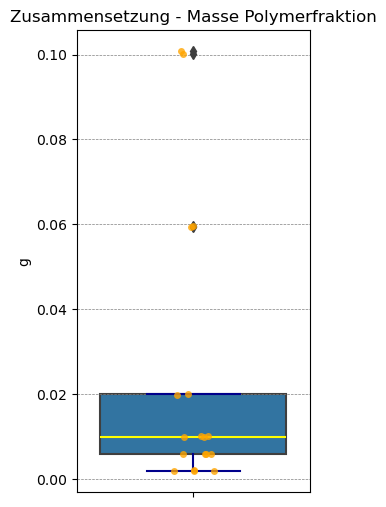

In [45]:
def create_boxplot_with_stripplot(df, column, title, ylabel, figsize=(3, 6)):
    """
    Erstellt einen Boxplot mit einem Stripplot darüber für die angegebene Spalte eines DataFrames.

    Parameters:
        df (pandas.DataFrame): Der DataFrame, der die Daten enthält.
        column (str): Der Name der Spalte im DataFrame, die geplottet werden soll.
        title (str): Der Titel des Plots.
        ylabel (str): Beschriftung der y-Achse.
        figsize (tuple): Größe der Figur (Breite, Höhe). Standard ist (3, 6).

    Returns:
        None
    """
    # Figur erstellen
    plt.figure(figsize=figsize)

    # Boxplot mit angepassten Eigenschaften
    sns.boxplot(
        y=df[column],
        medianprops=dict(color="yellow"),
        whiskerprops=dict(color="darkblue"),
        capprops=dict(color="darkblue")
    )

    # Punkte auf den Boxplot projizieren
    sns.stripplot(y=df[column], color="orange", alpha=0.8, jitter=True)

    # Titel und Achsenbeschriftung
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

    # Plot anzeigen
    plt.show()


    
create_boxplot_with_stripplot(df, column='Zusammensetzung_Masse Polymer [g]', 
                              title='Zusammensetzung - Masse Polymerfraktion', ylabel='g')

#### Auswertung

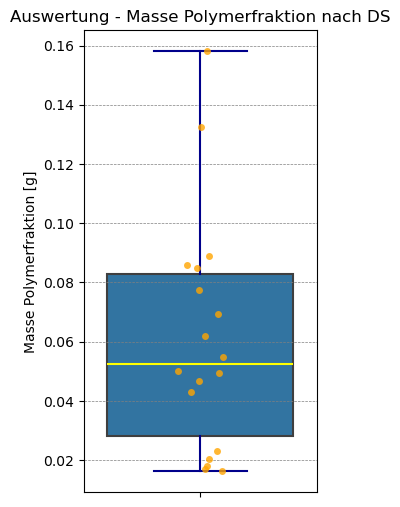

In [46]:
column = "Auswertung_Masse Polymerfraktion nach DS [g]"
title = "Auswertung - Masse Polymerfraktion nach DS"
ylabel = "Masse Polymerfraktion [g]"

create_boxplot_with_stripplot(df, column, title, ylabel)

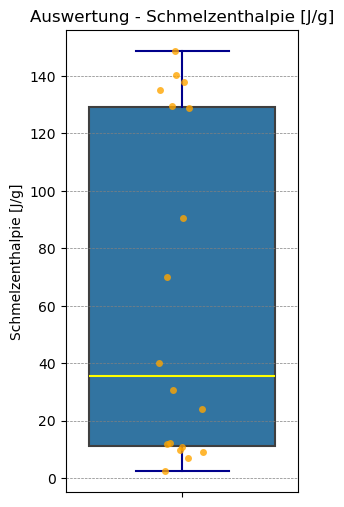

In [47]:
column = "Auswertung_Schmelzenthalpie [J/g]"
title = "Auswertung - Schmelzenthalpie [J/g]"
ylabel = "Schmelzenthalpie [J/g]"
create_boxplot_with_stripplot(df, column, title, ylabel)

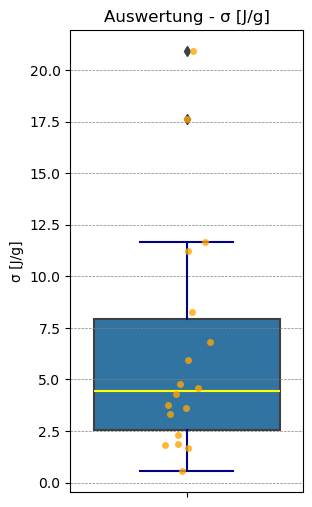

In [48]:
column = "Auswertung_σ [J/g]"
title = "Auswertung - σ [J/g]"
ylabel = "σ [J/g]"
create_boxplot_with_stripplot(df, column, title, ylabel)

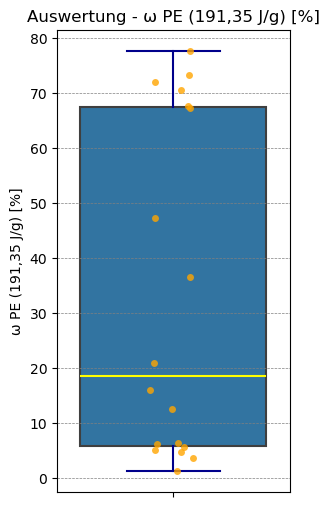

In [49]:
column = 'Auswertung_ω PE (191,35 J/g) [%]'
title = 'Auswertung - ω PE (191,35 J/g) [%]'
ylabel = "ω PE (191,35 J/g) [%]"
create_boxplot_with_stripplot(df, column, title, ylabel)

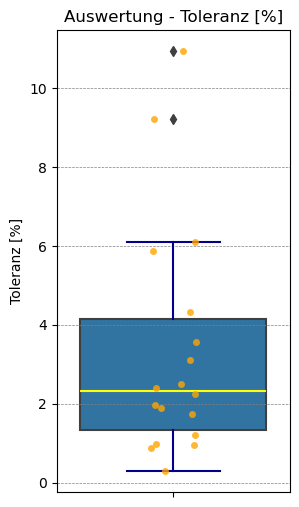

In [50]:
column = 'Auswertung_Toleranz [%]'
title = 'Auswertung - Toleranz [%]'
ylabel = "Toleranz [%]"
create_boxplot_with_stripplot(df, column, title, ylabel)

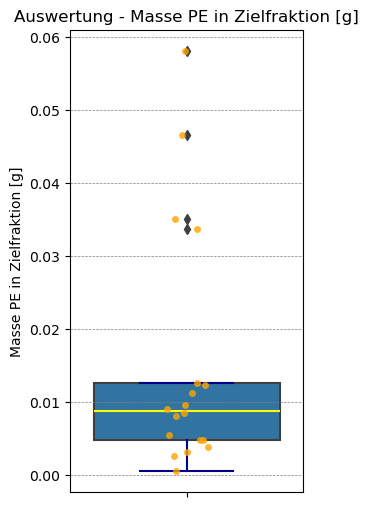

In [51]:
column = 'Auswertung_Masse PE in Zielfraktion [g]'
title = 'Auswertung - Masse PE in Zielfraktion [g]'
ylabel = "Masse PE in Zielfraktion [g]"
create_boxplot_with_stripplot(df, column, title, ylabel)

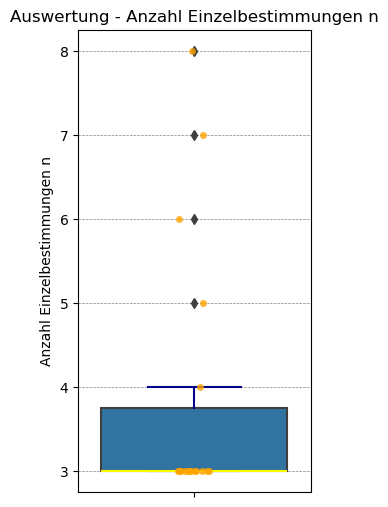

In [52]:
column = 'Auswertung_Anzahl Einzelbestimmungen n'
title = 'Auswertung - Anzahl Einzelbestimmungen n'
ylabel = "Anzahl Einzelbestimmungen n"
create_boxplot_with_stripplot(df, column, title, ylabel)

> nützlich???

In [53]:
print(df[column].value_counts())
print(f"\nAnzahl der verschiedenen Werte für {column}: {df[column].nunique()}")

Auswertung_Anzahl Einzelbestimmungen n
3.0    13
4.0     1
5.0     1
6.0     1
7.0     1
8.0     1
Name: count, dtype: int64

Anzahl der verschiedenen Werte für Auswertung_Anzahl Einzelbestimmungen n: 6


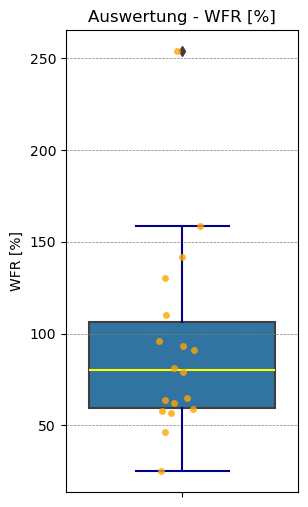

In [54]:
column = 'Auswertung_WFR [%]'
title = 'Auswertung - WFR [%]'
ylabel = "WFR [%]"
create_boxplot_with_stripplot(df, column, title, ylabel)

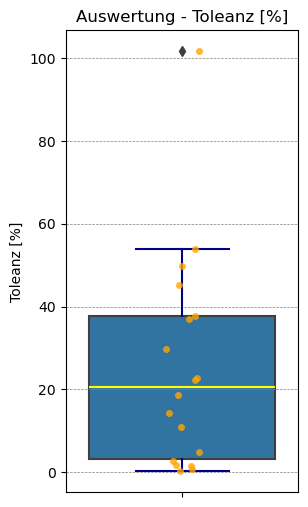

In [55]:
column = 'Auswertung_Toleanz [%]'
title = 'Auswertung - Toleanz [%]'
ylabel = "Toleanz [%]"
create_boxplot_with_stripplot(df, column, title, ylabel)

#### DSC-Messungen

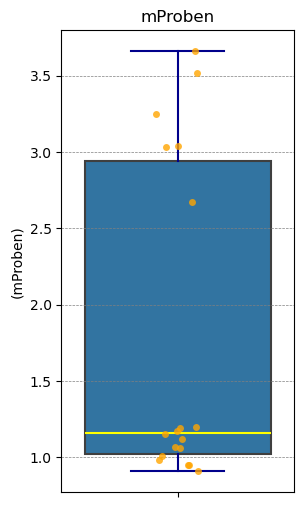

In [56]:
column = 'mProben'
title = 'mProben'
ylabel = "(mProben)"
create_boxplot_with_stripplot(df, column, title, ylabel)

dHm_90_150
später    6
94.65     1
12.9      1
75.85     1
47.86     1
16.36     1
4.391     1
10.05     1
14.6      1
3.616     1
10.32     1
8.694     1
8.494     1
Name: count, dtype: int64

Anzahl der verschiedenen Werte für dHm_90_150: 13


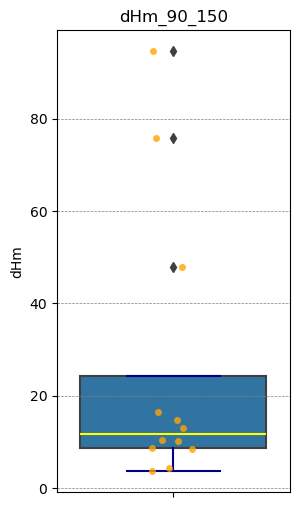

dHm_90_150
94.650    1
12.900    1
75.850    1
47.860    1
16.360    1
4.391     1
10.050    1
14.600    1
3.616     1
10.320    1
8.694     1
8.494     1
Name: count, dtype: int64

Anzahl der verschiedenen Werte für dHm_90_150: 12


In [57]:
# dHm_90_150
column = 'dHm_90_150'
print(df[column].value_counts())
print(f"\nAnzahl der verschiedenen Werte für {column}: {df[column].nunique()}")


# Sicherstellen, dass die Spalte numerische Werte enthält
df_filtered = df[df[column] != "später"].copy()

# Konvertiere die Spalte in numerische Werte, wobei nicht-numerische Werte ignoriert werden
df_filtered[column] = pd.to_numeric(df_filtered[column], errors='coerce')

title = 'dHm_90_150'
ylabel = 'dHm'
create_boxplot_with_stripplot(df_filtered , column, title, ylabel)

print(df_filtered[column].value_counts())
print(f"\nAnzahl der verschiedenen Werte für {column}: {df_filtered[column].nunique()}")

#### Ø;sigma_90_150

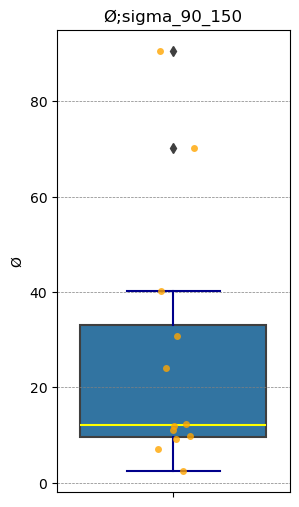

In [58]:
column = 'Ø;sigma_90_150'
title = 'Ø;sigma_90_150'
ylabel = "Ø"
create_boxplot_with_stripplot(df, column, title, ylabel)

#### Tm_90_150

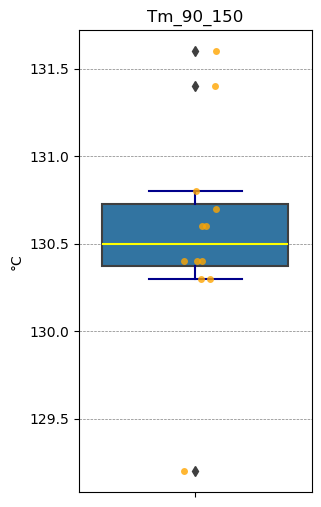

In [59]:
column = 'Tm_90_150'
title = 'Tm_90_150'
ylabel = '°C'
create_boxplot_with_stripplot(df, column, title, ylabel)

#### dHc_60_125

In [60]:
column = 'dHc_60_125'
print(df[column].value_counts())
print(f"\nAnzahl der verschiedenen Werte für {column}: {df[column].nunique()}")

dHc_60_125
-                                                                12
3 mg einwage später vermessen --> neue kalibrierung notwendig     1
blauer Partikel                                                   1
Name: count, dtype: int64

Anzahl der verschiedenen Werte für dHc_60_125: 3


#### Masse pro Tiegel

Tiegeleinwage [mg]
1.04    3
1.09    2
1.00    2
1.07    2
1.05    2
1.11    1
1.13    1
1.18    1
1.02    1
1.06    1
0.97    1
0.99    1
Name: count, dtype: int64

Anzahl der verschiedenen Werte für Tiegeleinwage [mg]: 12


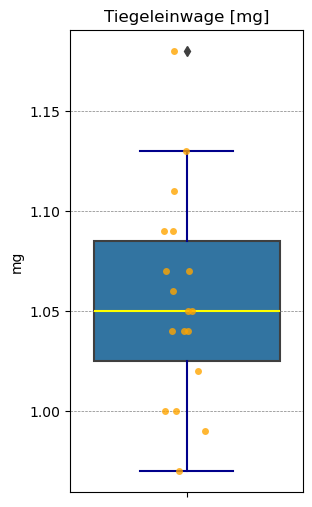

In [61]:
column = 'Tiegeleinwage [mg]'
print(df[column].value_counts())
print(f"\nAnzahl der verschiedenen Werte für {column}: {df[column].nunique()}")

title = 'Tiegeleinwage [mg]'
ylabel = 'mg'
create_boxplot_with_stripplot(df, column, title, ylabel)

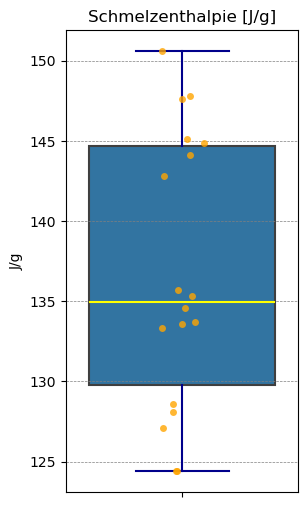

In [62]:
column = 'Schmelzenthalpie [J/g]'
title = 'Schmelzenthalpie [J/g]'
ylabel = 'J/g'
create_boxplot_with_stripplot(df, column, title, ylabel)

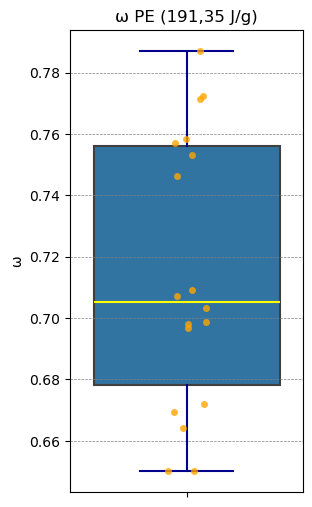

In [63]:
column = 'ω PE (191,35 J/g) [ ]'
title = 'ω PE (191,35 J/g)'
ylabel = 'ω'
create_boxplot_with_stripplot(df, column, title, ylabel)

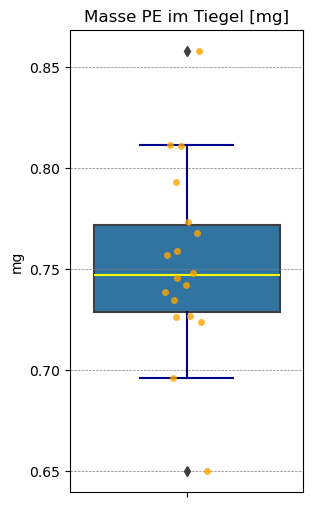

In [64]:
column = 'Masse PE im Tiegel [mg]'
title = 'Masse PE im Tiegel [mg]'
ylabel = 'mg'
create_boxplot_with_stripplot(df, column, title, ylabel)

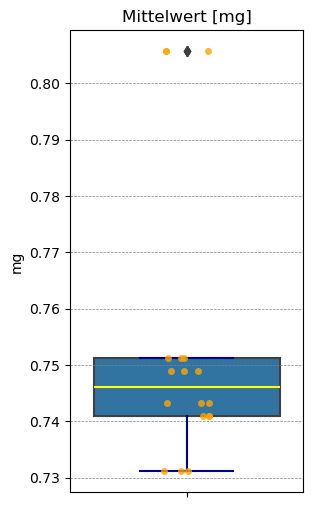

In [65]:
column = 'Mittelwert [mg]'
title = 'Mittelwert [mg]'
ylabel = 'mg'
create_boxplot_with_stripplot(df, column, title, ylabel)

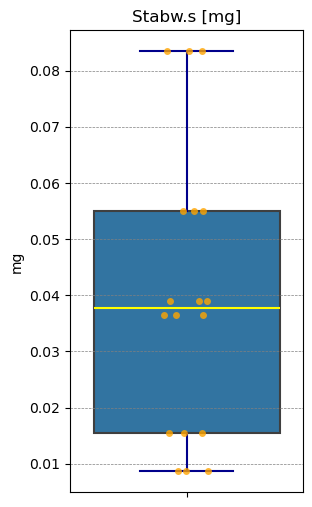

In [66]:
column = 'Stabw.s [mg]'
title = 'Stabw.s [mg]'
ylabel = 'mg'
create_boxplot_with_stripplot(df, column, title, ylabel)

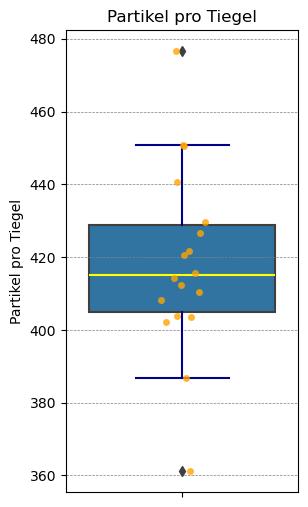

In [67]:
column = 'Partikle pro Tiegel [ ]'
title = 'Partikel pro Tiegel'
ylabel = 'Partikel pro Tiegel'
create_boxplot_with_stripplot(df, column, title, ylabel)

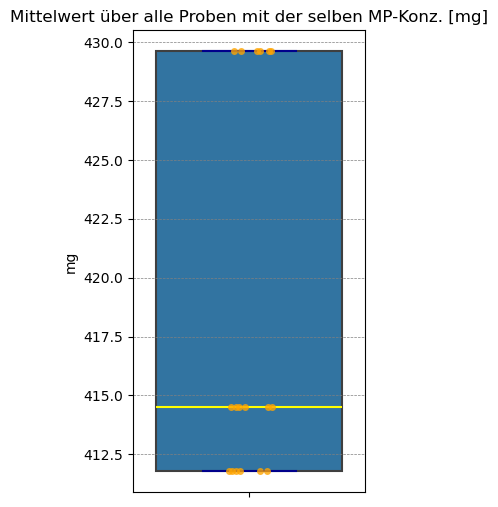

In [68]:
column = 'Mittelwert über alle Proben mit der selben MP-Konz. [mg]'
title = 'Mittelwert über alle Proben mit der selben MP-Konz. [mg]'
ylabel = 'mg'
create_boxplot_with_stripplot(df, column, title, ylabel)

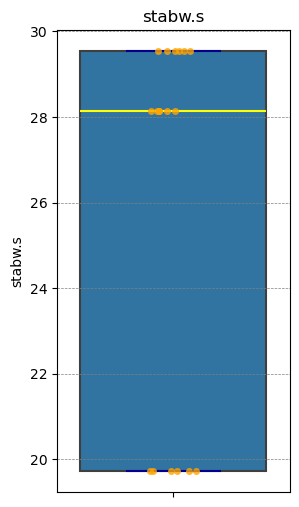

In [69]:
column = 'stabw.s'
title = 'stabw.s'
ylabel = 'stabw.s'
create_boxplot_with_stripplot(df, column, title, ylabel)

### b) Erkenntnisse

#### nicht relavant:
- "Lfd. Nr."
- "Temperaturprogramm"
- "Nummer" 
- "Untersuchung"
- "Probenhalter" (Nummerierung!) 

#### nicht unterscheidbar:
- "Zusammensetzung_Polymer"

#### schlechte Datenqualität:
- "dHm_90_150"
- "dHc_60_125"

#### unklar / redundant / eindeutig identifizierbar:
- "Bezeichnung_x", "Bezeichnung_y" & "DatumderDSCMessung_Probe" 

#### weitere Erkenntnisse
- viele Ausreißer 

## 3) Cleaning

In [70]:
# Listen für die Kategorien
nicht_relevant = ["Lfd. Nr.", "Temperaturprogramm", "Nummer", "Untersuchung", "Probenhalter"]
nicht_unterscheidbar = ["Zusammensetzung_Polymer"]
schlechte_datenqualitaet = ["dHm_90_150", "dHc_60_125"]
unklar_redundant = ["Bezeichnung_x", "Bezeichnung_y", "DatumderDSCMessung_Probe"]

# Zusammenführen der Listen
alle_spalten_zum_entfernen = nicht_relevant + nicht_unterscheidbar + schlechte_datenqualitaet + unklar_redundant

# Entfernen der Spalten
df_relevant = df.drop(columns=alle_spalten_zum_entfernen)


# Spaltennamen bereinigen
df_relevant.columns = [col.replace(' ', '_').replace('[', '').replace(']', '') for col in df_relevant.columns]
df_relevant

,Zusammensetzung_Matrix,Zusammensetzung_Masse_Polymer_g,Auswertung_Masse_Polymerfraktion_nach_DS_g,Auswertung_Schmelzenthalpie_J/g,Auswertung_σ_J/g,"Auswertung_ω_PE_(191,35_J/g)_%",Auswertung_Toleranz_%,Auswertung_Masse_PE_in_Zielfraktion_g,Auswertung_Anzahl_Einzelbestimmungen_n,Auswertung_WFR_%,...,Tm_90_150,Tiegeleinwage_mg,Schmelzenthalpie_J/g,"ω_PE_(191,35_J/g)__",Masse_PE_im_Tiegel_mg,Mittelwert_mg,Stabw.s_mg,Partikle_pro_Tiegel__,Mittelwert_über_alle_Proben_mit_der_selben_MP-Konz._mg,stabw.s
0,PF Sand,0.1001,0.0858,129.500000,3.328663,67.677032,1.739568,0.058067,3.0,58.008884,...,NaN,1.11,133.3,0.696629,0.773258,0.731166,0.039009,429.588015,411.786623,19.725074
1,PF Sand,0.1008,0.0692,128.866667,4.605793,67.346050,2.406999,0.046603,3.0,46.233598,...,NaN,1.04,128.1,0.669454,0.696232,0.731166,0.039009,386.795575,411.786623,19.725074
2,PF Sand,0.0596,0.0467,137.866667,11.673189,72.049473,6.100438,0.033647,3.0,56.454872,...,NaN,1.09,127.1,0.664228,0.724008,0.731166,0.039009,402.226868,411.786623,19.725074
3,PF Sand,0.0595,0.0496,135.200000,0.556776,70.655866,0.290973,0.035045,3.0,58.899680,...,NaN,1.13,124.4,0.650118,0.734633,0.751266,0.036426,408.129373,411.786623,19.725074
4,PF Sand,0.0198,0.0163,148.666667,1.677299,77.693581,0.876561,0.012664,3.0,63.959867,...,NaN,1.18,128.6,0.672067,0.793039,0.751266,0.036426,440.577185,411.786623,19.725074
5,PF Sand,0.0200,0.0169,140.466667,5.953430,73.408240,3.111278,0.012406,3.0,62.029963,...,NaN,1.04,133.6,0.698197,0.726125,0.751266,0.036426,403.402723,411.786623,19.725074
6,PF Elbe,0.0100,0.0203,90.540000,20.920022,47.316436,10.932857,0.009605,3.0,96.052365,...,130.8,1.02,144.1,0.753070,0.768132,0.743209,0.083469,426.739831,414.491092,29.538009
7,PF Elbe,0.0102,0.0501,30.726667,17.623636,16.057835,9.210157,0.008045,3.0,78.872306,...,130.4,1.00,124.4,0.650118,0.650118,0.743209,0.083469,361.176436,414.491092,29.538009
8,PF Elbe,0.0060,0.0232,70.156667,11.248228,36.664054,5.878353,0.008506,3.0,141.767674,...,131.4,1.07,145.1,0.758296,0.811377,0.743209,0.083469,450.765032,414.491092,29.538009
9,PF Elbe,0.0059,0.0182,40.246667,6.832001,21.033011,3.570421,0.003828,3.0,64.881492,...,131.6,1.06,134.6,0.703423,0.745628,0.748959,0.008682,414.238016,414.491092,29.538009


In [71]:
df_relevant.dtypes

Zusammensetzung_Matrix                                     object
Zusammensetzung_Masse_Polymer_g                           float64
Auswertung_Masse_Polymerfraktion_nach_DS_g                float64
Auswertung_Schmelzenthalpie_J/g                           float64
Auswertung_σ_J/g                                          float64
Auswertung_ω_PE_(191,35_J/g)_%                            float64
Auswertung_Toleranz_%                                     float64
Auswertung_Masse_PE_in_Zielfraktion_g                     float64
Auswertung_Anzahl_Einzelbestimmungen_n                    float64
Auswertung_WFR_%                                          float64
Auswertung_Toleanz_%                                      float64
mProben                                                   float64
Ø;sigma_90_150                                            float64
Tm_90_150                                                 float64
Tiegeleinwage_mg                                          float64
Schmelzent

In [72]:
df_relevant.to_csv("data/002_dataset.csv", index=False)
df_relevant.to_excel("data/Excel/002_dataset.xlsx", index=False)

## VI) Erste ML Ansatz

In [73]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [74]:
#df = pd.read_csv("data/00_dataset.csv")
df = df_relevant
df.head(8)

,Zusammensetzung_Matrix,Zusammensetzung_Masse_Polymer_g,Auswertung_Masse_Polymerfraktion_nach_DS_g,Auswertung_Schmelzenthalpie_J/g,Auswertung_σ_J/g,"Auswertung_ω_PE_(191,35_J/g)_%",Auswertung_Toleranz_%,Auswertung_Masse_PE_in_Zielfraktion_g,Auswertung_Anzahl_Einzelbestimmungen_n,Auswertung_WFR_%,...,Tm_90_150,Tiegeleinwage_mg,Schmelzenthalpie_J/g,"ω_PE_(191,35_J/g)__",Masse_PE_im_Tiegel_mg,Mittelwert_mg,Stabw.s_mg,Partikle_pro_Tiegel__,Mittelwert_über_alle_Proben_mit_der_selben_MP-Konz._mg,stabw.s
0,PF Sand,0.1001,0.0858,129.500000,3.328663,67.677032,1.739568,0.058067,3.0,58.008884,...,NaN,1.11,133.3,0.696629,0.773258,0.731166,0.039009,429.588015,411.786623,19.725074
1,PF Sand,0.1008,0.0692,128.866667,4.605793,67.346050,2.406999,0.046603,3.0,46.233598,...,NaN,1.04,128.1,0.669454,0.696232,0.731166,0.039009,386.795575,411.786623,19.725074
2,PF Sand,0.0596,0.0467,137.866667,11.673189,72.049473,6.100438,0.033647,3.0,56.454872,...,NaN,1.09,127.1,0.664228,0.724008,0.731166,0.039009,402.226868,411.786623,19.725074
3,PF Sand,0.0595,0.0496,135.200000,0.556776,70.655866,0.290973,0.035045,3.0,58.899680,...,NaN,1.13,124.4,0.650118,0.734633,0.751266,0.036426,408.129373,411.786623,19.725074
4,PF Sand,0.0198,0.0163,148.666667,1.677299,77.693581,0.876561,0.012664,3.0,63.959867,...,NaN,1.18,128.6,0.672067,0.793039,0.751266,0.036426,440.577185,411.786623,19.725074
5,PF Sand,0.0200,0.0169,140.466667,5.953430,73.408240,3.111278,0.012406,3.0,62.029963,...,NaN,1.04,133.6,0.698197,0.726125,0.751266,0.036426,403.402723,411.786623,19.725074
6,PF Elbe,0.0100,0.0203,90.540000,20.920022,47.316436,10.932857,0.009605,3.0,96.052365,...,130.8,1.02,144.1,0.753070,0.768132,0.743209,0.083469,426.739831,414.491092,29.538009
7,PF Elbe,0.0102,0.0501,30.726667,17.623636,16.057835,9.210157,0.008045,3.0,78.872306,...,130.4,1.00,124.4,0.650118,0.650118,0.743209,0.083469,361.176436,414.491092,29.538009


### 1) Klassifikationsmodell für `Zusammensetzung_Matrix`

In [75]:
# Kodieren der kategorialen Variable für Zusammensetzung_Matrix
le_matrix = LabelEncoder()
df['Zusammensetzung_Matrix_encoded'] = le_matrix.fit_transform(df['Zusammensetzung_Matrix'])

In [76]:
# Merkmale und Zielvariable für Klassifikation definieren
X = df.drop(columns=['Zusammensetzung_Matrix', 'Zusammensetzung_Masse_Polymer_g', 'Zusammensetzung_Matrix_encoded'])
y_class = df['Zusammensetzung_Matrix_encoded']

In [77]:
# Datenaufteilung in Trainings- und Testdaten
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)

In [78]:
# Klassifikations-Parameter für XGBoost
params_class = {
    'objective': 'multi:softmax',
    'num_class': len(le_matrix.classes_),
    'eval_metric': 'mlogloss'
}

In [79]:
# DMatrix für das Klassifikationsmodell
dtrain_class = xgb.DMatrix(X_train, label=y_train_class)
dtest_class = xgb.DMatrix(X_test, label=y_test_class)

In [80]:
# Trainieren des Klassifikationsmodells
bst_class = xgb.train(params_class, dtrain_class, num_boost_round=100)
y_pred_class = bst_class.predict(dtest_class)

In [81]:
# Bewertung des Klassifikationsmodells
accuracy_class = accuracy_score(y_test_class, y_pred_class)
classification_rep_class = classification_report(y_test_class, y_pred_class, target_names=le_matrix.classes_)

# Ausgabe der Klassifikationsergebnisse
print("=== Klassifikationsergebnisse für Zusammensetzung_Matrix ===")
print("Klassifikationsgenauigkeit:", accuracy_class)
print("\nKlassifikationsbericht:\n", classification_rep_class)

=== Klassifikationsergebnisse für Zusammensetzung_Matrix ===
Klassifikationsgenauigkeit: 1.0

Klassifikationsbericht:
               precision    recall  f1-score   support

     PF Elbe       1.00      1.00      1.00         1
     PF Sand       1.00      1.00      1.00         4
PF Weißeritz       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



> "überangepasst" bzw./und die Testmenge von 6 ist wenig!!!

### 2) Regressionsmodell für `Zusammensetzung_Masse_Polymer_g`

In [82]:
# Merkmale definieren
X = df.drop(columns=['Zusammensetzung_Masse_Polymer_g', 'Zusammensetzung_Matrix'])

# Zielvariable für Regression definieren
y_reg = df['Zusammensetzung_Masse_Polymer_g']

In [83]:
# Datasets für die Regression aufteilen
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)

In [84]:
# Regressions-Parameter für XGBoost
params_reg = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# DMatrix für das Regressionsmodell
dtrain_reg = xgb.DMatrix(X_train, label=y_train_reg)
dtest_reg = xgb.DMatrix(X_test, label=y_test_reg)

# Trainieren des Regressionsmodells
bst_reg = xgb.train(params_reg, dtrain_reg, num_boost_round=100)
y_pred_reg = bst_reg.predict(dtest_reg)

In [85]:
# Bewertung des Regressionsmodells
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

# Ausgabe des RMSE für die Regression
print("\n=== Regressionsanalyse für Zusammensetzung_Masse_Polymer [g] ===")
print("Root Mean Squared Error (RMSE):", rmse)


=== Regressionsanalyse für Zusammensetzung_Masse_Polymer [g] ===
Root Mean Squared Error (RMSE): 0.029521069716740563


In [86]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_reg, y_pred_reg)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.019243080341319243


In [87]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_reg, y_pred_reg)
print("R²-Score:", r2)

R²-Score: 0.4552605396258844


In [88]:
mape = np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

Mean Absolute Percentage Error (MAPE): 31.296739800572777 %
